# Font-type Recognition with <font color=yellow>CNN / ConvNets : Convolutional Neural Networks</font> using [Keras](https://keras.io/)</font>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras logo" height="100" width="250"> 

---

* <font size=5 color='green'>Machine Learning Lab (MLLB)</font>
 
---
---


In [1]:
import keras

from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

      
print('Keras version: ',keras.__version__)

Keras version:  2.4.3


## <font color= #00cc00>Next cells load the Font Type dataset:</font>


In [2]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

onehot= to_categorical(labels, num_classes=len(np.unique(labels)))

## Preparing Train/Test Data :
- ### Random Permutation! + split data into training / validation

In [3]:
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]


In [4]:
train=train.reshape([-1,train.shape[1],train.shape[2],1])
test=test.reshape([-1,test.shape[1],test.shape[2],1])

print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 36, 36, 1) 
Test shape= (279, 36, 36, 1)


## Try CNN / ConvNet models in Keras (remember):

1.   **Define your model**. Create a sequence and add layers.
2.   **Compile your model**. Specify loss functions and optimizers
3.   **Fit your model**. Execute the model using data.
4.   **Make predictions**. Use the model to generate predictions on new data.


## 1.   **Define your ConNet model**:

## ...a model similar as the one we used in TensorFlow...

In [5]:
from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.layers import Convolution2D as Conv2D

model = Sequential()

# TRANSPA(41 del pptx) 
# input: 36x36 images with 1 channel -> (36, 36) tensors.
# this applies 4 convolution filters of size 5x5 each.
model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(36, 36,1)))
# 4 filters for the 4 images of time 5x5 d 

# especify the input shape of the first layer: shpe of the size of original img
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())#take the pooling and put them into a vector
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


## <font color=yellow> You can try other  ConvNet styles: i.e. VGG style

  
  [ConvNet Arquitectures](https://medium.com/@siddharthdas_32104/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
  
  **CNNs Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more …**

The ImageNet project is a large visual database designed for use in visual object recognition software research. The ImageNet project runs an annual software contest, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), where software programs compete to correctly classify and detect objects and scenes

In [ ]:
'''model = Sequential()
# input: 36x36 images with 1 channel -> (36, 36) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(36, 36,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
'''

## 2.   **Compile your model**. Specify loss functions and optimizers

In [7]:
from keras.optimizers import SGD


model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [8]:
model.summary() #dense layer la que mas param tiene entrenados

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 4)         104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 33,069
Trainable params: 33,069
Non-trainable params: 0
____________________________________________________

# 3.   **Fit your model**. Train the model using data.

In [9]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 23ms/step - loss: 1.6006 - accuracy: 0.2361 - val_loss: 1.5259 - val_accuracy: 0.1971
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 1.4721 - accuracy: 0.3156 - val_loss: 1.2984 - val_accuracy: 0.4875
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 1.2614 - accuracy: 0.4586 - val_loss: 1.0532 - val_accuracy: 0.5627
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0311 - accuracy: 0.5419 - val_loss: 0.8923 - val_accuracy: 0.5771
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9605 - accuracy: 0.5591 - val_loss: 0.8335 - val_accuracy: 0.6237
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8518 - accuracy: 0.6124 - val_loss: 0.7595 - val_accuracy: 0.6882
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7960 - accuracy: 0.6427 - val_loss: 0.7137 - val_accuracy: 0.7240
Epoch 8/100


## Note:
* another possibility is just specify  $validation\_split$ = 0.10 ... so that 10% (or the % you indicate) of training data is used for validation



In [ ]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
'''
history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_split = 0.10,
         verbose=1)
'''

## 4.   **Make predictions**. Use the model to generate predictions on new data.

In [10]:
# Check accuracy on train set

loss_train, accuracy_train = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

20/20 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9960

Training Accuracy= 0.9960175156593323
3/3 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.9462

Test Accuracy= 0.9462365508079529


In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Train Accuracy:  0.95
Test_Accuracy:  0.95


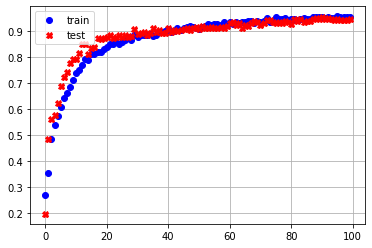

In [15]:
print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()

# Get predictions / probabilities ...

In [13]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[9.50736023e-08 4.61282255e-03 1.96712696e-14 1.06155674e-03
  9.94325459e-01]
 [5.44235093e-07 9.99998927e-01 4.59503680e-09 3.98820760e-07
  1.48582117e-07]
 [4.55701666e-13 1.16245625e-04 9.55754882e-25 5.84949667e-05
  9.99825299e-01]
 [9.74981904e-01 3.97693875e-05 2.49783695e-02 7.35262545e-14
  4.25640467e-10]
 [7.76659304e-38 5.28929741e-05 0.00000000e+00 9.99947071e-01
  3.40368705e-12]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

Confusion Matrix:
 [[53  1  7  0  0]
 [ 2 68  1  0  0]
 [ 4  0 44  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 56]]


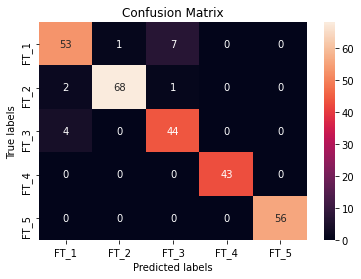

In [14]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);